In [2]:
# from neo4j import GraphDatabase
# from py2neo import Graph
# from NewElementTypeSet import *
# from ElementType import *
# graph = Graph('bolt://localhost:7687',name='social')
# graph = Graph('bolt://localhost:11003')
from SimBaseTopo import *
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Evaluation import *
import seaborn as sns

In [4]:
import pickle
# with open('stored_schema/snb_schema_emailLanguage_modifiedEdgeTypeSet','rb') as f:
with open('stored_schema/schema_mb6_allNodesRels.pickle','rb') as f:
    sc = pickle.load(f)
with open('stored_schema/schema_mb6_ground_truth.pickle','rb') as f:
    mb_sc_gt = pickle.load(f)
from Schema import Schema
# len(sc.nodetypeset),len(sc.edgetypeset)
# gt_sc = get_snb_with_incEdgesAndOutEdges()[0]

# gt_sc
sc.computeF1score(mb_sc_gt,CONSIDER_EDGES=False)
# sc.mergeByLabelsSet()
sc.mergeByJaccardSim(theta=0.5,idf=False,mode='p')
sc.computeF1score(mb_sc_gt,CONSIDER_EDGES=False,ANALYSE_MODE=False)

computing node f1 score ignoredatatype False consider edges False
tp:  3 fn: 1 fp:  49
precision:  0.057692307692307696
recall:  0.75
f1_score:  0.10714285714285714
tp:  3 fn: 2 fp:  458
precision:  0.006507592190889371
recall:  0.6
f1_score:  0.012875536480686695
merge node by  p
4 clusters found out of 52 nodes
merge edge by  p
5 clusters found out of 461 nodes
computing node f1 score ignoredatatype False consider edges False
tp:  4 fn: 0 fp:  0
precision:  1.0
recall:  1.0
f1_score:  1.0
tp:  5 fn: 0 fp:  0
precision:  1.0
recall:  1.0
f1_score:  1.0


(1.0, 1.0, 1.0, 1.0, 1.0, 1.0)

In [3]:
sc_tax = get_taxonomy()
# sc_tax.print()
G_tax_gt = getGraphFromSchema(sc_tax)

In [66]:
eg_G = nx.MultiDiGraph()
eg_G.add_nodes_from([(0,{'Person':'label','Name':'Sam','age':12}),
                    (1, {'Person':'lb','Name':'Tom'}),
                    (2, {'Person':'lb','Name':'John','Phone':35})])
eg_G.add_edges_from([(0,1,{'knows':'lbl'}),(1,2,{'knows':'lbl','at':'school'})])
node_sim_matrix = getNodeSimilarityMatrixByAttr(eg_G,'attr')
edge_sim_matrix = getEdgeSimilarityMatrixByAttr(eg_G, 'attr')

100%|██████████| 2/2 [00:00<00:00, 667.88it/s]

getting node matrix with mode  attr
getting edge matrix with mode  attr


In [3]:
sc_gt, sc = get_nolabel_SNB_gt()
# sc_gt = get_gt_northwind()
# sc_gt = get_taxonomy()

mode = 'p'
G, node2partition, edge2partition, node_partitions, \
    edge_partitions, node_partition_sim, edge_partition_sim,sc_gen =  \
                    generateGraphFromSchema(sc_gt,l=0,p=0.5,rand_s=3,rand_t=8, edge_num=8,mode=mode)
node_sim_matrix = getNodeSimilarityMatrixByAttr(G,mode)
edge_sim_matrix = getEdgeSimilarityMatrixByAttr(G,mode)
node_sim_matrix_cp = node_sim_matrix.copy()
edge_sim_matrix_cp = edge_sim_matrix.copy()
# for k in range(1,20):
# k=50
# n_sim,e_sim = objectSimBased(G, node_sim_matrix, edge_sim_matrix, coef =[0]+[1/k]*k,TOBO_BASED_ONLY = True)
# sc = getSchemaFromSimMatrix(G, n_sim, e_sim,theta=0.99)
#     print(k,np.round(n_sim,2))

# n_p,n_r,n_f1,e_p,e_r,e_f1 = sc.computeF1score(sc_gt,CONSIDER_EDGES=True,
#                                     WEIGHTED=True,CONSIDER_EDGES_OF_SRC_TAR=True)
# with open('result/obj-sim-based/sim_matrix/lt_e8_node.npy','rb') as f:
#     node_sim_matrix_cp = np.load(f)
# with open('result/obj-sim-based/sim_matrix/lt_e8_edge.npy','rb') as f:
#     edge_sim_matrix_cp = np.load(f)

78it [00:00, 3712.53it/s]
677it [00:00, 5939.16it/s]

rand_s 3 rand_t 8
getting node matrix with mode  p



  0%|          | 0/677 [00:00<?, ?it/s]

getting edge matrix with mode  p


100%|██████████| 677/677 [12:38<00:00,  1.12s/it]


In [4]:
with open('result/obj-sim-based/sim_matrix/pt_e8_node.npy','wb') as f:
    np.save(f, node_sim_matrix)
with open('result/obj-sim-based/sim_matrix/pt_e8_edge.npy','wb') as f:
    np.save(f, edge_sim_matrix)
node_sim_matrix_cp = node_sim_matrix.copy()
edge_sim_matrix_cp = edge_sim_matrix.copy()

In [108]:
G_gen = getGraphFromSchema(sc)
G_gen.nodes,G_gen.edges

(NodeView((0, 1, 2, 3, 4, 5, 6)),
 MultiEdgeView([(0, 1, 0), (1, 2, 0), (2, 3, 0), (3, 4, 0), (4, 5, 0), (5, 6, 0)]))

NetworkXNoCycle: No cycle found.

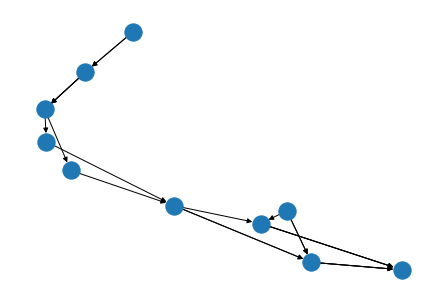

In [90]:
G.nodes,G.edges
# sc = getSchemaFromSimMatrix(l_p*node_sim_matrix+t_p*topo_node_sim,
#                        l_p*edge_sim_matrix+topo_edge_sim)
nx.draw(G)
nx.algorithms.dag.dag_longest_path(G)
nx.algorithms.cycles.find_cycle(G)

In [43]:
node_sim_gt = getNodeSimilarityMatrixByAttr(G_gt,'attrs')
edge_sim_gt = getEdgeSimilarityMatrixByAttr(G_gt,'attrs')

NameError: name 'G_gt' is not defined

In [13]:
# node_sim_matrix_l = getNodeSimilarityMatrixByAttr(G,'l')
# edge_sim_matrix_l = getEdgeSimilarityMatrixByAttr(G,'l')
sc = getSchemaFromSimMatrix(G, node_sim_matrix_l, edge_sim_matrix_l,theta=0.5)
sc.computeF1score(sc_gt,CONSIDER_EDGES=False,
                    WEIGHTED=True,CONSIDER_EDGES_OF_SRC_TAR=False)

computing node f1 score ignoredatatype False consider edges False
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 13 fp:  1
precision:  0.0
recall:  0.0
f1_score:  0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 13 fp:  11
precision:  0.0
recall:  0.0
f1_score:  0


(0.0, 0.0, 0, 0.0, 0.0, 0)

In [26]:
# node_sim_matrix_p = getNodeSimilarityMatrixByAttr(G,'p')
# edge_sim_matrix_p = getEdgeSimilarityMatrixByAttr(G,'p')
# n_sim,e_sim = objectSimBased(G, node_sim_matrix_p, edge_sim_matrix_p, coef =[0.9]+[0.1],TOBO_BASED_ONLY = False)
sc = getSchemaFromSimMatrix(G, node_sim_matrix_p, edge_sim_matrix_p,theta=0.9)
sc.computeF1score(sc_gt,CONSIDER_EDGES=True,
                    WEIGHTED=True,CONSIDER_EDGES_OF_SRC_TAR=False)

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
tp:  11.0 fn: 2 fp:  1.0
precision:  0.9166666666666666
recall:  0.8461538461538461
f1_score:  0.8799999999999999
duplicate TP count:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
tp:  13.0 fn: 0 fp:  0.0
precision:  1.0
recall:  1.0
f1_score:  1.0


(0.9166666666666666, 0.8461538461538461, 0.8799999999999999, 1.0, 1.0, 1.0)

In [5]:

# node_sim_matrix = getNodeSimilarityMatrixByAttr(G,'l')
# edge_sim_matrix = getEdgeSimilarityMatrixByAttr(G,'l')
# node_sim_matrix, edge_sim_matrix = np.ones((len(G.nodes), len(G.nodes))), np.ones((len(G.edges), len(G.edges)))

# G=G_gt
# node_sim_matrix *= 0.4
# edge_sim_matrix *= 0.4

        
def objectSimBased(G, node_sim_matrix=None, edge_sim_matrix=None, coef=[0.5,0.5],TOBO_BASED_ONLY = True):
#     set_trace()
    emap, cnt = {}, 0
    for e in G.edges:
        emap[e],cnt = cnt, cnt+1
    
    k_node = k_edge =  k = len(coef)-1
    if coef[0]==0:
        TOBO_BASED_ONLY = True
    if TOBO_BASED_ONLY:
        node_sim_matrix, edge_sim_matrix = np.ones((len(G.nodes), \
                            len(G.nodes))), np.ones((len(G.edges), len(G.edges)))
    old_n = node_sim_matrix.copy()
    old_e = edge_sim_matrix.copy()
        
    for level in range(k):
        topo_node_sim = getTopoNodeSim(G, node_sim_matrix, edge_sim_matrix, emap,method='j')
        topo_edge_sim = getTopoEdgeSim(G, node_sim_matrix, edge_sim_matrix, emap)
        if TOBO_BASED_ONLY==True and level==0:
            node_sim_matrix = topo_node_sim*coef[level+1]
            edge_sim_matrix = topo_edge_sim*coef[level+1]
        elif TOBO_BASED_ONLY == False and level==0:
            node_sim_matrix = coef[0]*node_sim_matrix + coef[1]*topo_node_sim
            edge_sim_matrix = coef[0]*edge_sim_matrix + coef[1]*topo_edge_sim
        elif level>0:
            node_sim_matrix += coef[level+1]/sum(coef[:level+1]) * topo_node_sim
            edge_sim_matrix += coef[level+1]/sum(coef[:level+1]) * topo_edge_sim
        old_n = node_sim_matrix.copy()
        old_e = edge_sim_matrix.copy()
    return node_sim_matrix, edge_sim_matrix

n_f1_m = np.zeros((11,11))#{i*0.1+0.1:0 for i in range(10)}
e_f1_m = np.zeros((11,11))# {i*0.1+0.1:0 for i in range(10)}

# n_f1_m = {}
# e_f1_m = {}
for para in range(11):
    para *=0.1
    k = 1
    node_sim_matrix, edge_sim_matrix = node_sim_matrix_cp.copy(), edge_sim_matrix_cp.copy()
    if para==1:
        n_sim,e_sim = node_sim_matrix, edge_sim_matrix
    else:
        n_sim,e_sim = objectSimBased(G, node_sim_matrix, edge_sim_matrix, coef =[para]+[(1-para)/k]*k,TOBO_BASED_ONLY = False)
    for l_p in range(11):
        print('t',1-para,'theta',l_p)
        l_p = 0.1*l_p
#         t_p = 1-l_p
    #         if level==0:
    #             node_sim_matrix = coef[level] * topo_node_sim
    #             edge_sim_matrix = coef[level] * topo_edge_sim
    #         else:
    #             node_sim_matrix += coef[level] * topo_node_sim
    #             edge_sim_matrix += coef[level] * topo_edge_sim
    #     sc = getSchemaFromSimMatrix(G, l_p*node_sim_matrix+t_p*topo_node_sim,
    #                        l_p*edge_sim_matrix+t_p*topo_edge_sim)
        if l_p==1:
            sc = getSchemaFromSimMatrix(G, n_sim, e_sim,theta=0.99)
        else:
            sc = getSchemaFromSimMatrix(G, n_sim, e_sim,theta=l_p)

    #     print(l_p,np.unique(topo_edge_sim,return_counts=True))
    #     if l_p==1:
    #         sc = getSchemaFromSimMatrix(l_p*node_sim_matrix+t_p*topo_node_sim,
    #                            l_p*edge_sim_matrix)        
        n_p,n_r,n_f1,e_p,e_r,e_f1 = sc.computeF1score(sc_gt,CONSIDER_EDGES=True,
                                    WEIGHTED=True,CONSIDER_EDGES_OF_SRC_TAR=True)
#         n_f1_m[l_p]=[n_p,n_r,n_f1,e_p,e_r,e_f1]
        n_f1_m[int(para*10),int(l_p*10)] = n_f1
        e_f1_m[int(para*10),int(l_p*10)] = e_f1
#         n_f1_m[k] = [n_f1,len(sc.nodetypeset)]
#         e_f1_m[k] = [e_f1, len(sc.edgetypeset)]
    #     e_f1_m[l_p]=[]


t 1.0 theta 0
precision:  0.0
recall:  0.0
f1_score:  0
precision:  0.0
recall:  0.0
f1_score:  0
t 1.0 theta 1
precision:  0.0
recall:  0.0
f1_score:  0
precision:  0.0
recall:  0.0
f1_score:  0
t 1.0 theta 2
precision:  0.0
recall:  0.0
f1_score:  0
precision:  0.0
recall:  0.0
f1_score:  0
t 1.0 theta 3
precision:  0.0
recall:  0.0
f1_score:  0
precision:  0.0
recall:  0.0
f1_score:  0
t 1.0 theta 4
precision:  0.0
recall:  0.0
f1_score:  0
precision:  0.0
recall:  0.0
f1_score:  0
t 1.0 theta 5
precision:  0.0
recall:  0.0
f1_score:  0
precision:  0.0
recall:  0.0
f1_score:  0
t 1.0 theta 6
precision:  0.0
recall:  0.0
f1_score:  0
precision:  0.0
recall:  0.0
f1_score:  0
t 1.0 theta 7
precision:  0.0
recall:  0.0
f1_score:  0
precision:  0.0
recall:  0.0
f1_score:  0
t 1.0 theta 8
precision:  0.0
recall:  0.0
f1_score:  0
precision:  0.0
recall:  0.0
f1_score:  0
t 1.0 theta 9
precision:  0.0
recall:  0.0
f1_score:  0
precision:  0.0
recall:  0.0
f1_score:  0
t 1.0 theta 10
preci

precision:  0.6
recall:  0.21428571428571427
f1_score:  0.3157894736842105
precision:  0.0
recall:  0.0
f1_score:  0
t 0.3999999999999999 theta 8
precision:  0.4444444444444444
recall:  0.2857142857142857
f1_score:  0.34782608695652173
precision:  0.0
recall:  0.0
f1_score:  0
t 0.3999999999999999 theta 9
precision:  0.3
recall:  0.21428571428571427
f1_score:  0.25
precision:  0.0
recall:  0.0
f1_score:  0
t 0.3999999999999999 theta 10
precision:  0.23076923076923078
recall:  0.21428571428571427
f1_score:  0.22222222222222224
precision:  0.0
recall:  0.0
f1_score:  0
t 0.29999999999999993 theta 0
precision:  0.0
recall:  0.0
f1_score:  0
precision:  0.0
recall:  0.0
f1_score:  0
t 0.29999999999999993 theta 1
precision:  0.0
recall:  0.0
f1_score:  0
precision:  0.0
recall:  0.0
f1_score:  0
t 0.29999999999999993 theta 2
precision:  0.0
recall:  0.0
f1_score:  0
precision:  0.0
recall:  0.0
f1_score:  0
t 0.29999999999999993 theta 3
precision:  0.0
recall:  0.0
f1_score:  0
precision:  

In [77]:
# n_sim,e_sim = objectSimBased(G, node_sim_matrix, edge_sim_matrix, coef =[0]+[1/40]*40,TOBO_BASED_ONLY = True)
# sc = getSchemaFromSimMatrix(G, n_sim, e_sim,theta=l_p)
# n_f1_m,e_f1_m


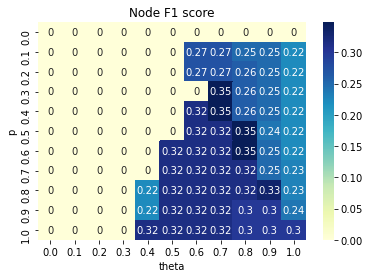

[Text(33.0, 0.5, 'p'),
 Text(0.5, 15.0, 'theta'),
 Text(0.5, 1.0, 'Edge F1 score')]

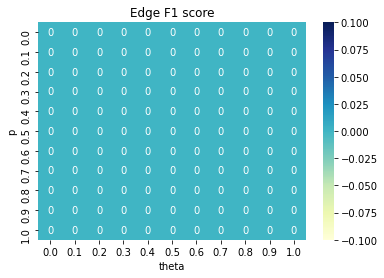

In [6]:
# print(n_f1_m,e_f1_m)
# sc = getSchemaFromSimMatrix(G, node_sim_matrix, edge_sim_matrix)
# sc.computeF1score(sc_gt,CONSIDER_EDGES=True,
#                                 WEIGHTED=True,CONSIDER_EDGES_OF_SRC_TAR=True,PRINT=False)
# len(sc.nodetypeset),len(sc.edgetypeset)
# for i in n_f1_m:
#     print(i, [round(j,2) for j in n_f1_m[i]])
# sc.print()
#     print(l_p,np.unique(topo_node_sim,return_counts=True))
#     print(l_p,np.unique(topo_edge_sim,return_counts=True))
#     if l_p==1:
#         sc = getSchemaFromSimMatrix(l_p*node_sim_matrix+t_p*topo_node_sim,
#                            l_p*edge_sim_matrix)        
# node_sim_matrix
x_axis_labels = [round(i*0.1,2) for i in range(11)]
ax = sns.heatmap(n_f1_m,cmap='YlGnBu',xticklabels=x_axis_labels, yticklabels=x_axis_labels,annot=True)
ax.set(title="Node F1 score",
      xlabel="theta",
      ylabel=mode,)
plt.show()
ax2 = sns.heatmap(e_f1_m,cmap='YlGnBu',xticklabels=x_axis_labels, yticklabels=x_axis_labels,annot=True)
ax2.set(title="Edge F1 score",
      xlabel="theta",
      ylabel=mode)

In [92]:
# prop_sc.computeF1score(sc_gt,CONSIDER_EDGES=True,
#                                 WEIGHTED=True,CONSIDER_EDGES_OF_SRC_TAR=True,PRINT=False)


In [106]:
G_gt = nx.MultiDiGraph()
G_gt.add_nodes_from([(index, nt.attributes) for index, nt in enumerate(sc_gt.nodetypeset.nodetypes)])
edge_type_list = []
for et in sc_gt.edgetypeset.edgetypes:
    src = findWithIs(sc_gt.nodetypeset.nodetypes, et.src_type)
    tar = findWithIs(sc_gt.nodetypeset.nodetypes, et.target_type)
    edge_type_list.append((src, tar, et.attributes))
G_gt.add_edges_from(edge_type_list)

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [97]:
G_gt

In [88]:
# for i in label_sc.nodetypeset:
#     i.print(True)
mix_sc.computeF1score(sc_gt,CONSIDER_EDGES=True,
                                WEIGHTED=True,CONSIDER_EDGES_OF_SRC_TAR=True,PRINT=False, ANALYSE_MODE=True)
# label_sc.print()

computing node f1 score ignoredatatype False consider edges True
FALSE POSITIVE
------------Content Type----------------
name     str            
url      str            
id       int            
incoming edges
{'STUDY_AT': {<class 'ElementType.LBL'>}, 'classYear': {<class 'int'>}}
{'WORK_AT': {<class 'ElementType.LBL'>}, 'workFrom': {<class 'int'>}}
outgoing  edges
{'IS_LOCATED_IN': {<class 'ElementType.LBL'>}}
FALSE POSITIVE
------------Content Type----------------
creationDate int            
browserUsed str            
locationIP str            
content  str            
length   int            
id       int            
language? str            
imageFile? str            
incoming edges
{'REPLY_OF': {<class 'ElementType.LBL'>}}
{'CONTAINER_OF': {<class 'ElementType.LBL'>}}
{'LIKES': {<class 'ElementType.LBL'>}, 'creationDate': {<class 'str'>}}
outgoing  edges
{'REPLY_OF': {<class 'ElementType.LBL'>}}
{'HAS_TAG': {<class 'ElementType.LBL'>}}
{'HAS_CREATOR': {<class 'ElementType.LBL'>

duplicate TP count:  [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  7.0 fn: 21 fp:  11.0


(0.7142857142857143,
 0.35714285714285715,
 0.4761904761904762,
 0.3888888888888889,
 0.25,
 0.30434782608695654)

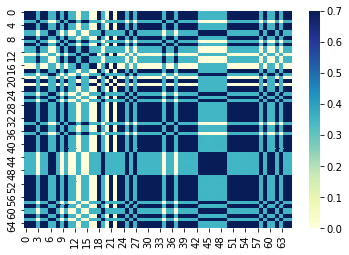

In [28]:
import seaborn as sns
# n_f1_m,e_f1_m
# n_p,n_r,n_f1,e_p,e_r,e_f1
# l_p=0.6, t_p=0.4
# sc = getSchemaFromSimMatrix(l_p*node_sim_matrix+t_p*topo_node_sim,
#                    l_p*edge_sim_matrix+t_p*topo_edge_sim)
# np.unique(topo_node_sim,return_counts=True)
# np.unique(topo_node_sim, return_counts=True)
sns.heatmap(topo_node_sim,cmap="YlGnBu")
# %debug computeSim(in_edges_i,\
#                        in_edges_j, edge_sim_matrix,method='e')

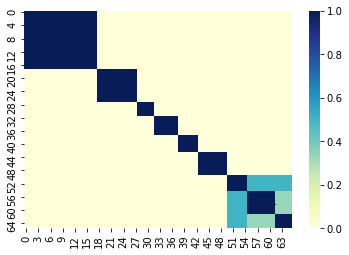

In [32]:
sns.heatmap(node_sim_matrix,cmap="YlGnBu")

In [21]:
# sc = getSchemaFromSimMatrix(node_sim_matrix,
#                        edge_sim_matrix)
# n_p,n_r,n_f1,e_p,e_r,e_f1 = sc.computeF1score(sc_gt,CONSIDER_EDGES=True,WEIGHTED=True,CONSIDER_EDGES_OF_SRC_TAR=True)
# n_p,n_r,n_f1,e_p,e_r,e_f1

{0.1: 0.05563562986451428,
 0.2: 0.05563562986451428,
 0.30000000000000004: 0.09387755102040816,
 0.4: 0.09387755102040816,
 0.5: 0.1197604790419162,
 0.6: 0.44,
 0.7000000000000001: 0.44,
 0.8: 0.15384615384615383,
 0.9: 0.15384615384615383,
 1.0: 0.4074074074074074}

In [8]:
# sc.computeF1score(sc_gt,CONSIDER_EDGES=True,WEIGHTED=True,CONSIDER_EDGES_OF_SRC_TAR=False)

In [3]:
# node_sim_matrix = getNodeSimilarityMatrixByAttr(G,'l')
# edge_sim_matrix = getEdgeSimilarityMatrixByAttr(G,'l')


In [111]:
topo_sck1.computeF1score(sc_gt,CONSIDER_EDGES=True,WEIGHTED=True,CONSIDER_EDGES_OF_SRC_TAR=False)
# [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0].index(1)
# sc_gt.nodetypeset[10].print(True)

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
tp:  2.0 fn: 12 fp:  2
precision:  0.5
recall:  0.14285714285714285
f1_score:  0.22222222222222224
duplicate TP count:  [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  3.0 fn: 25 fp:  15
precision:  0.16666666666666666
recall:  0.10714285714285714
f1_score:  0.13043478260869565


In [80]:
# remove_attr(topo_sck1)
topo_sck1.computeF1score(sc_gt,CONSIDER_EDGES=True,WEIGHTED=True,CONSIDER_EDGES_OF_SRC_TAR=True)
# topo_sck1.nodetypeset.print()

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
tp:  1.0 fn: 13 fp:  3
precision:  0.25
recall:  0.07142857142857142
f1_score:  0.11111111111111112
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  13
precision:  0.0
recall:  0.0
f1_score:  0


In [55]:
node_type = NodeTypeSet()
edge_type_set = EdgeTypeSet()

# turn labels to attributes
def preprocessPy2neoNode(node):
    node_dict = dict(node)
    # convert labels to attribute
    labels = str(node.labels).split(':')[1:]
    for l in labels:
        node_dict[l] = LBL()
    return node_dict

In [67]:
import py2neo
subg = graph.run('MATCH (n) where rand() <= 0.001 OPTIONAL MATCH (n)-[r]-() return *').to_subgraph()

In [68]:
len(subg.relationships),len(subg.nodes)

(2119, 2051)

In [69]:
# node_type = NodeTypeSet()
# at least one match
nodes = list(subg._Subgraph__nodes)
for i,n in enumerate(nodes):
    node = nodes[i]
    node_dict = dict(node)
    # convert labels to attribute
    labels = str(node.labels).split(':')[1:]
    for l in labels:
        node_dict[l] = LBL()

    node_type.add(node_dict)

In [70]:

relationships = list(subg._Subgraph__relationships)
for i, r in enumerate(relationships):

    relation = relationships[i]
    relation[type(relation).__name__] = LBL()
    # it's possible that a relationship have more than two nodes
    edge_type_set.add(relation)

In [73]:
def tojson(type_list):
    # type_list is a list of types
    res = []
    for t in type_list:
        # new dict of type, serilized
        type_dict = {}
        nt = t.getAttrs()

        for k in nt:
            type_dict[k] = [i.__name__ for i in list(nt[k])]
        res.append(type_dict)
    return res
        
types = tojson(node_type.nodetypes)

In [74]:
import json
json.dumps(types)

'[{"birthday": ["int"], "firstName": ["str"], "lastName": ["str"], "gender": ["str"], "browserUsed": ["str"], "locationIP": ["str"], "id": ["int"], "creationDate": ["int"], "Person": ["LBL"]}, {"name": ["str"], "id": ["int"], "url": ["str"], "Tag": ["LBL"]}, {"browserUsed": ["str"], "length": ["int"], "locationIP": ["str"], "id": ["int"], "creationDate": ["int"], "content": ["str"], "Comment": ["LBL"], "Message": ["LBL"]}, {"id": ["int"], "title": ["str"], "creationDate": ["int"], "Forum": ["LBL"]}, {"name": ["str"], "id": ["int"], "url": ["str"], "Organisation": ["LBL"], "University": ["LBL"]}, {"imageFile": ["str"], "browserUsed": ["str"], "length": ["int"], "locationIP": ["str"], "id": ["int"], "creationDate": ["int"], "Message": ["LBL"], "Post": ["LBL"]}, {"name": ["str"], "id": ["int"], "url": ["str"], "Country": ["LBL"], "Place": ["LBL"]}, {"browserUsed": ["str"], "length": ["int"], "locationIP": ["str"], "language": ["str"], "id": ["int"], "creationDate": ["int"], "content": ["s

In [75]:
types

[{'birthday': ['int'],
  'firstName': ['str'],
  'lastName': ['str'],
  'gender': ['str'],
  'browserUsed': ['str'],
  'locationIP': ['str'],
  'id': ['int'],
  'creationDate': ['int'],
  'Person': ['LBL']},
 {'name': ['str'], 'id': ['int'], 'url': ['str'], 'Tag': ['LBL']},
 {'browserUsed': ['str'],
  'length': ['int'],
  'locationIP': ['str'],
  'id': ['int'],
  'creationDate': ['int'],
  'content': ['str'],
  'Comment': ['LBL'],
  'Message': ['LBL']},
 {'id': ['int'], 'title': ['str'], 'creationDate': ['int'], 'Forum': ['LBL']},
 {'name': ['str'],
  'id': ['int'],
  'url': ['str'],
  'Organisation': ['LBL'],
  'University': ['LBL']},
 {'imageFile': ['str'],
  'browserUsed': ['str'],
  'length': ['int'],
  'locationIP': ['str'],
  'id': ['int'],
  'creationDate': ['int'],
  'Message': ['LBL'],
  'Post': ['LBL']},
 {'name': ['str'],
  'id': ['int'],
  'url': ['str'],
  'Country': ['LBL'],
  'Place': ['LBL']},
 {'browserUsed': ['str'],
  'length': ['int'],
  'locationIP': ['str'],
  'la

In [77]:
len(edge_type_set.edgetypes)


26